# Predicting House Prices In King County

## Business Problem

## Objectives

## Data Dictionary
- id - unique identified for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - of Bedrooms/House
- bathroomsNumber - of bathrooms/bedrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Data Preparation

We're going to use pandas, matplotlib and numpy for data analysis and manipulation.

In [1]:
# Import all the tools we need 

# Regular EDA (Exploratory Data Analysis) and plotting libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# We want our plots to appear iniside the notebook
%matplotlib inline

# Models form Scikit-Learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [2]:
df = pd.read_csv("../data/kc_house_data.csv")
df.shape # How many (rows, columns)

(21597, 21)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter expert on the data you're working with.

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How an you add, change or remove features to get more out of your data?

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
# Checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
# Dropping columns that don't majorly determine price
dropped_df = df.drop(["id", "date"], axis=1)
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [9]:
# # Remove all missing values
dropped_df.dropna(inplace=True)

In [10]:
# Checking for missing values
dropped_df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


We can see above in the bathroom columns that there are some values that have decimal points. A house cannot have `2.25` or `4.50` bathrooms. That is logically incorrect. We can fix this by rounding off all the values in the column.

In [12]:
# Roudning off the values in the bathroom column
dropped_df["bathrooms"] = dropped_df.bathrooms.round()
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000.0,4,4.0,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500.0,3,2.0,1715,6819,2.0,0.0,0.0,3,7,1715,?,1995,0.0,98003,47.3097,-122.327,2238,6819


In [13]:
# dropped_df.drop(["sqft_basement"], axis=1, inplace=True)
dropped_df.replace(to_replace='?', value='0', inplace=True)

In [14]:
# Make a correlation matrix
dropped_df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.305489,0.519409,0.706189,0.084504,0.259505,0.274212,0.396862,0.034367,0.664146,0.612014,0.316204,0.049345,0.122731,-0.049502,0.306607,0.021215,0.581572,0.079402
bedrooms,0.305489,1.000000,0.483212,0.573575,0.025460,0.180485,-0.005833,0.080577,0.020074,0.354243,0.474272,0.296710,0.153229,0.017430,-0.147255,-0.005917,0.129370,0.390720,0.025217
bathrooms,0.519409,0.483212,1.000000,0.696612,0.085958,0.373569,0.068432,0.196437,-0.071855,0.591139,0.597375,0.321947,0.376417,0.063324,-0.139082,0.053677,0.146882,0.494629,0.085113
sqft_living,0.706189,0.573575,0.696612,1.000000,0.165336,0.359407,0.111491,0.285506,-0.062319,0.764251,0.876176,0.429486,0.314220,0.050232,-0.196537,0.058394,0.239521,0.756676,0.176820
sqft_lot,0.084504,0.025460,0.085958,0.165336,1.000000,-0.009924,0.025982,0.077073,-0.016036,0.108950,0.174216,0.016740,0.051578,0.002147,-0.129494,-0.084304,0.231638,0.145393,0.718489
floors,0.259505,0.180485,0.373569,0.359407,-0.009924,1.000000,0.018382,0.027518,-0.261013,0.459843,0.529101,-0.238999,0.487052,-0.000720,-0.058130,0.058190,0.129769,0.281982,-0.013571
waterfront,0.274212,-0.005833,0.068432,0.111491,0.025982,0.018382,1.000000,0.409773,0.016454,0.083034,0.077165,0.086743,-0.024068,0.087800,0.030391,-0.015935,-0.042324,0.090588,0.029636
view,0.396862,0.080577,0.196437,0.285506,0.077073,0.027518,0.409773,1.000000,0.046354,0.248679,0.170726,0.268047,-0.056645,0.098386,0.086479,0.008403,-0.078500,0.277778,0.071496
condition,0.034367,0.020074,-0.071855,-0.062319,-0.016036,-0.261013,0.016454,0.046354,1.000000,-0.147810,-0.157958,0.160627,-0.366938,-0.060845,0.001685,-0.022250,-0.105823,-0.096336,-0.005139
grade,0.664146,0.354243,0.591139,0.764251,0.108950,0.459843,0.083034,0.248679,-0.147810,1.000000,0.758289,0.164397,0.443286,0.011795,-0.184120,0.117425,0.200680,0.717031,0.116671


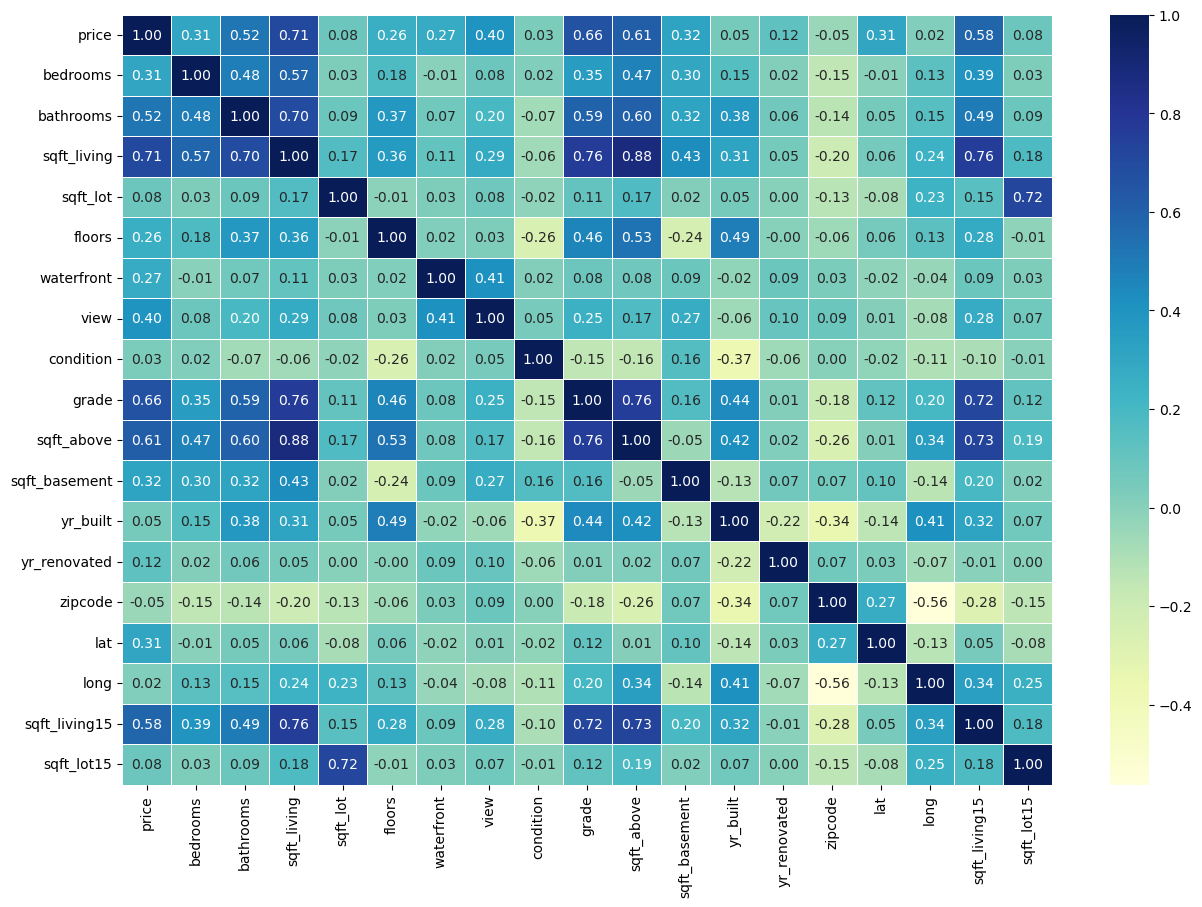

In [15]:
# Let's make our correlation matrix a little prettier
corr_matrix = dropped_df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

In [16]:
dropped_df.corr()['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.706189
grade            0.664146
sqft_above       0.612014
sqft_living15    0.581572
bathrooms        0.519409
view             0.396862
sqft_basement    0.316204
lat              0.306607
bedrooms         0.305489
waterfront       0.274212
floors           0.259505
yr_renovated     0.122731
sqft_lot         0.084504
sqft_lot15       0.079402
yr_built         0.049345
condition        0.034367
long             0.021215
zipcode         -0.049502
Name: price, dtype: float64

## Modelling

In [17]:
dropped_df.drop(["zipcode"], axis=1, inplace=True)

In [18]:
dropped_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,538000.0,3,2.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
3,604000.0,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,510000.0,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.0,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,47.6561,-122.005,4760,101930
6,257500.0,3,2.0,1715,6819,2.0,0.0,0.0,3,7,1715,0,1995,0.0,47.3097,-122.327,2238,6819


In [19]:
# Split the data into X and y
X = dropped_df.drop("price", axis=1)
y = dropped_df["price"]

In [20]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
1,3,2.0,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,47.7210,-122.319,1690,7639
3,4,3.0,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,47.5208,-122.393,1360,5000
4,3,2.0,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,47.6168,-122.045,1800,7503
5,4,4.0,5420,101930,1.0,0.0,0.0,3,11,3890,1530.0,2001,0.0,47.6561,-122.005,4760,101930
6,3,2.0,1715,6819,2.0,0.0,0.0,3,7,1715,0,1995,0.0,47.3097,-122.327,2238,6819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,3,2.0,1310,1294,2.0,0.0,0.0,3,8,1180,130.0,2008,0.0,47.5773,-122.409,1330,1265
21592,3,2.0,1530,1131,3.0,0.0,0.0,3,8,1530,0.0,2009,0.0,47.6993,-122.346,1530,1509
21593,4,2.0,2310,5813,2.0,0.0,0.0,3,8,2310,0.0,2014,0.0,47.5107,-122.362,1830,7200
21594,2,1.0,1020,1350,2.0,0.0,0.0,3,7,1020,0.0,2009,0.0,47.5944,-122.299,1020,2007


In [21]:
y

1         538000.0
3         604000.0
4         510000.0
5        1230000.0
6         257500.0
           ...    
21591     475000.0
21592     360000.0
21593     400000.0
21594     402101.0
21596     325000.0
Name: price, Length: 15762, dtype: float64

In [22]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2)

In [23]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
18060,4,2.0,1810,9000,1.5,0.0,0.0,3,7,1810,0.0,1960,0.0,47.4911,-122.322,1520,9780
4178,3,3.0,1850,9600,1.5,0.0,0.0,5,7,1850,0.0,1965,0.0,47.7259,-122.226,1250,10500
13219,3,2.0,1920,7779,2.0,0.0,0.0,3,7,1920,0.0,1989,0.0,47.4024,-122.171,1960,7536
2839,3,1.0,1140,5395,1.0,0.0,0.0,4,7,1010,130.0,1909,0.0,47.6782,-122.306,1700,5376
5520,3,2.0,1660,10440,1.0,0.0,0.0,3,7,1040,620.0,1978,0.0,47.4448,-121.770,1240,10380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7129,3,1.0,1460,8400,1.0,0.0,0.0,4,6,1460,0.0,1962,0.0,47.3086,-122.365,1060,8563
18336,3,2.0,2230,8558,2.0,0.0,0.0,3,8,2230,0.0,1960,0.0,47.5833,-122.219,2200,8558
7384,4,2.0,3200,7500,1.5,0.0,1.0,5,8,1860,1340.0,1948,0.0,47.6826,-122.274,2500,6500
1159,4,3.0,3460,7749,2.0,0.0,1.0,3,10,3020,440.0,1950,1998.0,47.6849,-122.273,3030,8680


In [24]:
y_train, len(y_train)

(18060     259000.0
 4178      489200.0
 13219     279000.0
 2839      576000.0
 5520      288000.0
            ...    
 7129      222000.0
 18336     685000.0
 7384     1180000.0
 1159     1750000.0
 9955      359999.0
 Name: price, Length: 12609, dtype: float64,
 12609)

Now we've got our data split into training and test sets, it's time to build a machine learning model. We'll train it (find the patterns) on the training set and we'll test it (use the patterns) on the test set.


In [25]:
# Instaniciate the model
regressor = LinearRegression()

# Set random seed
np.random.seed(42)

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Evaluate the model
score = regressor.score(X_test, y_test)
score

0.7034188544885777

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 36118189341.209496
R^2 Score: 0.7034188544885777


In [27]:
# Calculate and print variance
variance = dropped_df['price'].var()
print(f"Variance of house prices: {variance}")

Variance of house prices: 138552075016.07205


In [28]:
print(mse / variance)

0.2606831354710479
